<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Coba4/Model%201_Scratch/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-processing

In [2]:
import tensorflow as tf
import keras
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils

In [3]:
#load file
data= pd.read_csv('/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [5]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
labels=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [6]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [7]:
#split data 
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [8]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("x_val:",X_val.shape)
print("y_val:",y_val.shape)
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (28709, 48, 48, 1)
y_train: (28709, 7)
x_val: (3589, 48, 48, 1)
y_val: (3589, 7)
x_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [10]:
#data augmentation
'''datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 10,
                             horizontal_flip = True,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             fill_mode = 'nearest')'''

datagen = ImageDataGenerator(rescale=1./255)
testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [11]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [12]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

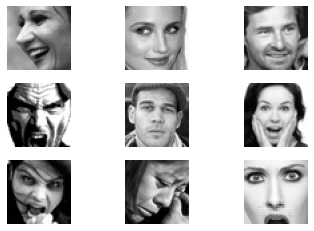

In [13]:
#displaying sample images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break

# Training Model

In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [15]:
from keras.optimizers import Adam,SGD,RMSprop

In [16]:
#compile model
adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [17]:
# fit the model
num_epochs = 100
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/100
448/448 [==============================] - 72s 53ms/step - loss: 2.1631 - accuracy: 0.1844 - val_loss: 1.8323 - val_accuracy: 0.2489
Epoch 2/100
448/448 [==============================] - 22s 50ms/step - loss: 1.8419 - accuracy: 0.2231 - val_loss: 1.8514 - val_accuracy: 0.2497
Epoch 3/100
448/448 [==============================] - 23s 51ms/step - loss: 1.8316 - accuracy: 0.2231 - val_loss: 1.8700 - val_accuracy: 0.2134
Epoch 4/100
448/448 [==============================] - 23s 51ms/step - loss: 1.8153 - accuracy: 0.2323 - val_loss: 1.8621 - val_accuracy: 0.2492
Epoch 5/100
448/448 [==============================] - 23s 52ms/step - loss: 1.8166 - accuracy: 0.2375 - val_loss: 1.8703 - val_accuracy: 0.2497
Epoch 6/100
448/448 [==============================] - 24s 53ms/step - loss: 1.8054 - accuracy: 0.2441 - val_loss: 1.8902 - val_accuracy: 0.2492
Epoch 7/100
448/448 [==============================] - 24s 53ms/step - loss: 1.7859 - accuracy: 0.2508 - val_loss: 1.8976 - val_ac

In [28]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/VGG16_Model4_Fix_noAug.h5")
print("saved")

saved


# Evaluate

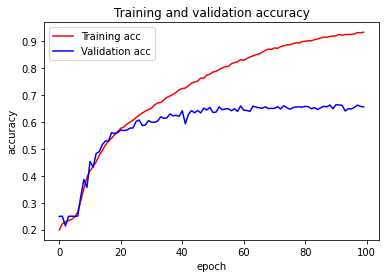

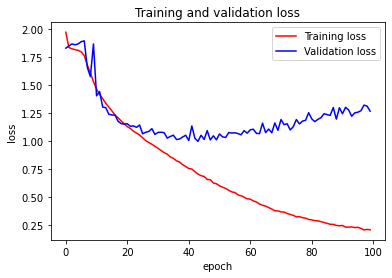

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [20]:
trainloss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 7s 16ms/step - loss: 0.0526 - accuracy: 0.9938
Train Loss 0.05263911932706833
Train Acc: 0.9937998652458191
56/56 [==============================] - 1s 20ms/step - loss: 1.2683 - accuracy: 0.6551
Val Loss 1.268272876739502
Val Acc: 0.6550571322441101
56/56 [==============================] - 1s 16ms/step - loss: 1.2407 - accuracy: 0.6698
Test Loss 1.2407234907150269
Test Acc: 0.669824481010437


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

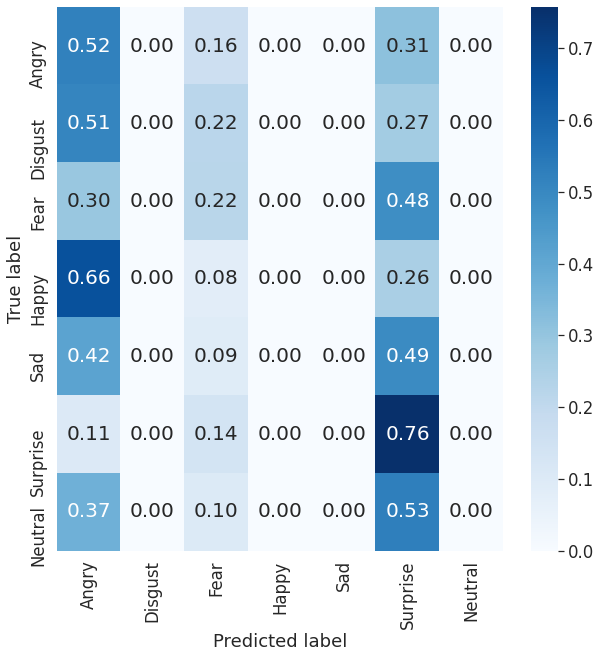

In [22]:
y_pred = model.predict_classes(X_test)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, 
                 annot=True, 
                 linewidths=0, 
                 square=False, 
                 cmap="Blues", 
                 yticklabels=emotion_labels, 
                 xticklabels=emotion_labels, 
                 vmin=0,  
                 vmax=np.max(cm_normalised), 
                 fmt=".2f", 
                 annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

In [23]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[257   0  80   0   0 154   0]
 [ 28   0  12   0   0  15   0]
 [156   0 117   0   0 255   0]
 [581   0  71   1   0 226   0]
 [247   0  54   0   0 293   0]
 [ 44   0  57   0   0 315   0]
 [233   0  63   0   0 330   0]]


In [24]:
y_testt = np.argmax(y_test, axis=1)

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(y_testt, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.17      0.52      0.25       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.26      0.22      0.24       528
       Happy       1.00      0.00      0.00       879
         Sad       0.00      0.00      0.00       594
    Surprise       0.20      0.76      0.31       416
     Neutral       0.00      0.00      0.00       626

    accuracy                           0.19      3589
   macro avg       0.23      0.21      0.12      3589
weighted avg       0.33      0.19      0.11      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Load Model

In [29]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/VGG16_Model4_Fix_noAug.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [30]:
trainloss = model_load.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model_load.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model_load.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 8s 16ms/step - loss: 0.0526 - accuracy: 0.9938
Train Loss 0.05263912305235863
Train Acc: 0.9937998652458191
56/56 [==============================] - 1s 16ms/step - loss: 1.2683 - accuracy: 0.6551
Val Loss 1.268273115158081
Val Acc: 0.6550571322441101
56/56 [==============================] - 1s 16ms/step - loss: 1.2407 - accuracy: 0.6698
Test Loss 1.240723729133606
Test Acc: 0.669824481010437


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

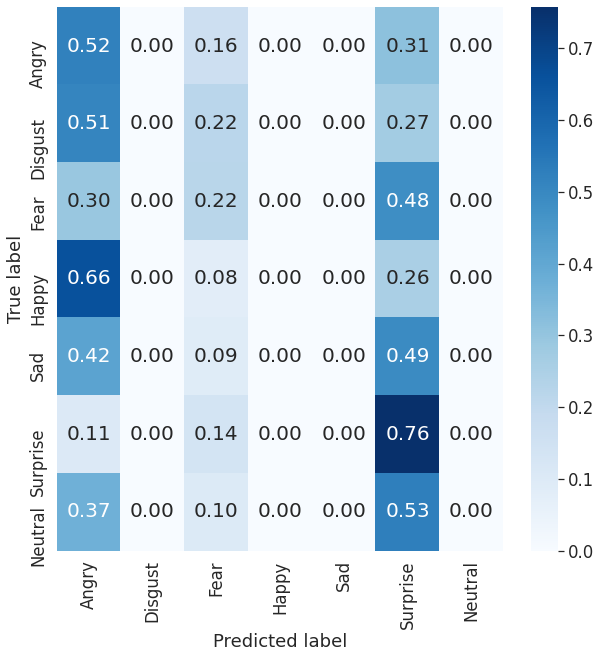

In [31]:
y_pred = model_load.predict_classes(X_test)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, 
                 annot=True, 
                 linewidths=0, 
                 square=False, 
                 cmap="Blues", 
                 yticklabels=emotion_labels, 
                 xticklabels=emotion_labels, 
                 vmin=0, 
                 vmax=np.max(cm_normalised), 
                 fmt=".2f", 
                 annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

In [32]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[257   0  80   0   0 154   0]
 [ 28   0  12   0   0  15   0]
 [156   0 117   0   0 255   0]
 [581   0  71   1   0 226   0]
 [247   0  54   0   0 293   0]
 [ 44   0  57   0   0 315   0]
 [233   0  63   0   0 330   0]]


In [33]:
y_testt = np.argmax(y_test, axis=1)

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(y_testt, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.17      0.52      0.25       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.26      0.22      0.24       528
       Happy       1.00      0.00      0.00       879
         Sad       0.00      0.00      0.00       594
    Surprise       0.20      0.76      0.31       416
     Neutral       0.00      0.00      0.00       626

    accuracy                           0.19      3589
   macro avg       0.23      0.21      0.12      3589
weighted avg       0.33      0.19      0.11      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predict

In [ ]:
from skimage import io
img = image.load_img('/content/drive/My Drive/s.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/drive/My Drive/s.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',emotions_lab[ind])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: ignored